# salt result viz

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
import matplotlib.pyplot as plt
# import seaborn as sns
# from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

In [2]:
sys.path.insert(1, 'D:/spark-brc_gits/apexmf_git')

In [3]:
from apexmf import apexmf_pst_par, apexmf_utils
from apexmf import apexmf_pst_viz, apexmf_pst_utils
from apexmf.salt.analyzer import SaltAnalysis

# Set Path

In [10]:
cwd = "D:/Projects/BLM/reports/report_230831_final"

In [11]:
ani_wd = "D:/Projects/Watersheds/Animas/Analysis/AMRSs/calibration/main_ies_1_pp_rw_ies_init_zero"

In [33]:
# ani_wd = "D:\Projects\Watersheds\Animas\Analysis\AMRSs\calibration\main_ies_1_pp_rw_ies_init_zero"
price_wd = "D:/Projects/Watersheds/Price/AMRSs/4 APEX-MODFLOW-Salt Final"
white_wd = "D:/Projects/Watersheds/White/Analysis/AMRSs/APEX-MODFLOW-Salt_wr"
ug_wd = "D:/Projects/Watersheds/Green/Analysis/AMRSs/salt_cal_230117/gr_012721/APEX-MODFLOW_no_fracs"
dol_wd = "D:/Projects/Watersheds/Dolores/Analysis/AMRSs/apexmod_230124/dr_121120/dolores_amrs"
gu_wd = "D:/Projects/Watersheds/Gunnison/Analysis/AMRSs/Gunnison_APEX-MODFLOW-Salt/APEX-MODFLOW-Salt"

sub_ids = [75, 163, 66, 199, 1, 64]
rch_fnams = [f"SITE{sub_id}.RCH" for sub_id in sub_ids]
obd_col_nams = ["str_075", "sub_163", "sub066", "sub199", "sub001", "sub0064"]

tot_wds = [ani_wd, price_wd, white_wd, ug_wd, dol_wd, gu_wd]
st_dates = ["1/1/1987", "1/1/1990", "1/1/1985", "1/1/1995", "1/1/1987", "1/1/2007"]
cal_st_dates = ["1/1/1992", "1/1/1995", "1/1/1990", "1/1/2000", "1/1/1992", "1/1/2009"]
cal_ed_dates = ["12/31/2011", "12/31/2015", "12/31/2019", "12/31/2019", "12/31/2011", "12/31/2015"]
names = ['Animas', 'Price', 'White', 'Upper Green','Dolores', 'Gunnison']

# os.chdir(wd)

In [7]:
os.chdir(cwd)

In [46]:
def tot_stf():
    tot_df = pd.DataFrame()
    
    for i in range(6):
        df_stf = apexmf_pst_utils.extract_month_stf(
            os.path.join(tot_wds[i], rch_fnams[i]), [sub_ids[i]], st_dates[i], cal_st_dates[i], cal_ed_dates[i])
        
        stf_obd_inf = 'stf_mon.obd'
        col_name = obd_col_nams[i]
        
        stf_obd = pd.read_csv(
                    os.path.join(tot_wds[i], stf_obd_inf),
                    sep='\t',
                    usecols=['date', obd_col_nams[i]],
                    index_col=0,
                    parse_dates=True,
                    na_values=[-999, '']
                    )
        com_df = pd.concat([df_stf, stf_obd], axis=1).dropna()
        com_df.rename(columns={'str_sim': names[i]}, inplace=True)
        tot_df = pd.concat([tot_df, com_df], axis=1)
    return tot_df
        

In [47]:
df = tot_stf()

stf_075.txt file has been created...
Finished ...
stf_163.txt file has been created...
Finished ...
stf_066.txt file has been created...
Finished ...
stf_199.txt file has been created...
Finished ...
stf_001.txt file has been created...
Finished ...
stf_064.txt file has been created...
Finished ...


In [48]:
df

,Animas,str_075,Price,sub_163,White,sub066,Upper Green,sub199,Dolores,sub001,Gunnison,sub0064
1990-01-31,NaN,NaN,NaN,NaN,11.68,9.27,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,NaN,NaN,NaN,NaN,11.54,13.29,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-31,NaN,NaN,NaN,NaN,12.51,14.04,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-30,NaN,NaN,NaN,NaN,14.26,13.01,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-31,NaN,NaN,NaN,NaN,26.84,14.54,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,NaN,NaN,NaN,NaN,12.89,11.58,31.80,29.80,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,12.12,9.09,27.27,30.03,NaN,NaN,NaN,NaN
2019-10-31,NaN,NaN,NaN,NaN,12.43,11.43,33.71,31.02,NaN,NaN,NaN,NaN
2019-11-30,NaN,NaN,NaN,NaN,12.58,11.51,33.70,29.69,NaN,NaN,NaN,NaN


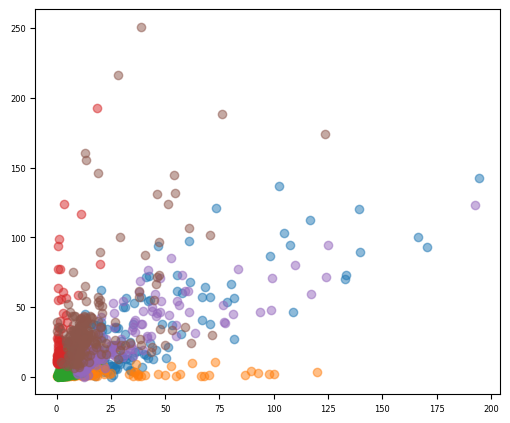

In [51]:
fig, ax = plt.subplots(figsize=(6,5))

for i in range(6):
    ax.scatter(
        df.iloc[:, i], df.iloc[:, i+1], alpha=0.5)
plt.show()